<a href="https://colab.research.google.com/github/Mohit501/MNIST-Digits-Classification/blob/main/Mnist_Classification_Using_Multi_Layer_Perceptrons_(MLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Required Libraries**

In [ ]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical,plot_model
from keras.datasets import mnist

## **Loading Data**

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# **Pre-Processing**

**Computing number of labels**

In [ ]:
num_labels = len(np.unique(y_train))

**Converting to one-hot vector**

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

**Image Dimensions**

In [ ]:
image_size = x_train.shape[1]
input_size = image_size*image_size


**Resize and Normalize**

In [ ]:
x_train = np.reshape(x_train,[-1,input_size])
x_train = x_train.astype('float32')/255.0
x_test = np.reshape(x_test,[-1,input_size])
x_test = x_test.astype('float32')/255.0

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
x_test.shape

(10000, 784)

# **MLP Model**

In [ ]:
model = Sequential()
model.add(Dense(256,input_dim = input_size,activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(num_labels,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


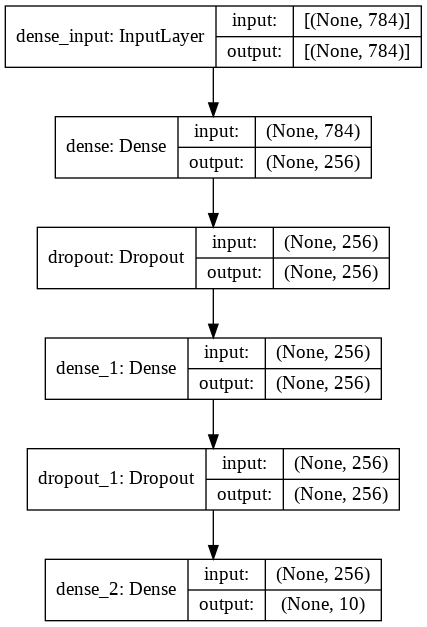

In [ ]:
plot_model(model,show_shapes = True)

In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [ ]:
model.fit(x_train,y_train,batch_size=128,epochs=20)

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.7454 - accuracy: 0.7626
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2100 - accuracy: 0.9373
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1546 - accuracy: 0.9544
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1262 - accuracy: 0.9609
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1132 - accuracy: 0.9659
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1023 - accuracy: 0.9683
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0926 - accuracy: 0.9715
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0832 - accuracy: 0.9741
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0815 - accuracy: 0.9735
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0735 - accuracy: 0.9756

In [ ]:
loss,acc = model.evaluate(x_test,y_test,batch_size = 128)

79/79 [==============================] - 0s 3ms/step - loss: 0.0683 - accuracy: 0.9813


In [ ]:
print(" Model loss on test data is:",loss)

 Model loss on test data is: 0.06834734976291656


In [ ]:
print("Accuracy on test data is:",acc*100)

Accuracy on test data is: 98.12999963760376


In [ ]:
model.predict(x_test)

array([[6.49082177e-11, 1.25863870e-08, 5.03597448e-07, ...,
        9.99999046e-01, 1.69904313e-10, 2.23046726e-07],
       [6.93281424e-13, 5.04976833e-06, 9.99994993e-01, ...,
        5.60474800e-12, 9.76921669e-12, 5.63554181e-17],
       [1.23760280e-10, 9.99997020e-01, 2.22448293e-07, ...,
        2.46426680e-06, 2.29371810e-08, 1.00080486e-10],
       ...,
       [4.59502711e-15, 1.88729338e-10, 7.98631235e-13, ...,
        8.29251778e-09, 1.15766407e-11, 2.38241242e-07],
       [6.75748452e-14, 1.58909666e-14, 9.09514015e-16, ...,
        1.32021857e-12, 6.58813804e-08, 1.63054927e-14],
       [2.30903299e-14, 4.89229396e-16, 4.58331019e-14, ...,
        6.59416088e-23, 1.15500930e-14, 7.51907177e-19]], dtype=float32)

In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)